In [42]:
%load_ext autoreload
%autoreload 2

from train_model import *
from dataset import *

import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset
As I cound not get an access to orgignal dataset, I an [analogue](https://www.kaggle.com/datasets/sorour/38cloud-cloud-segmentation-in-satellite-images/data) on kaggle.
Below are the commands for downloading dataset using kaggle API.

In [60]:
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d sorour/38cloud-cloud-segmentation-in-satellite-images
# !unzip -q 38cloud-cloud-segmentation-in-satellite-images.zip

Creating dataset instance and dataloader for training

In [80]:
base_path_train = Path('38-Cloud_training')
base_path_test = Path('38-Cloud_test')
data = CloudDataset(base_path_train/'train_red',
                    base_path_train/'train_green',
                    base_path_train/'train_blue',
                    base_path_train/'train_nir',
                    base_path_train/'train_gt')

train_dataloader, _ = get_dataloaders(base_path_train, base_path_test) # batch_size=16
len(train_dataloader)

525

In [22]:
x, y = data[100]
x.shape, y.shape

(torch.Size([3, 384, 384]), torch.Size([384, 384]))

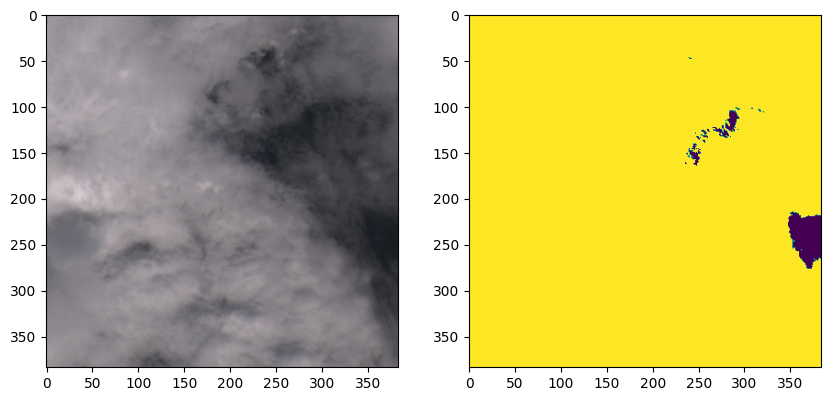

In [79]:
def plot_xy(idx):
    fig, ax = plt.subplots(1,2, figsize=(10,9))
    ax[0].imshow(data.open_as_array(idx))
    ax[1].imshow(data.open_mask(idx))

plot_xy(100)

In [32]:
max_epochs = 50
learning_rate = 1
device = 'cuda'

Let us define loss function. It is binary cross entropy, which is usually used in two-class tasks.

$$
\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right],
$$

where $y_i$ - true label, $\hat{y}_i$ - predicted, $\sigma(x)=\frac{1}{1+\exp(-x)}$ - sigmoid function.

In [33]:
def bce_loss(y_real, y_pred):
    return torch.mean(y_pred - y_real * y_pred + torch.log(1 + torch.exp(-y_pred)))

In [34]:
model = CloudSegNet().to(device)
optimizer = torch.optim.Adadelta(model.parameters(), lr=learning_rate)
loss = bce_loss

In [35]:
train(model, optimizer, loss, max_epochs, train_dataloader, device)

* Epoch 1/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.642114
* Epoch 2/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.612902
* Epoch 3/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.607299
* Epoch 4/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.595971
* Epoch 5/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.588960
* Epoch 6/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.588063
* Epoch 7/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.583892
* Epoch 8/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.579070
* Epoch 9/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.576610
* Epoch 10/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.573770
* Epoch 11/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.570092
* Epoch 12/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.569990
* Epoch 13/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.567510
* Epoch 14/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.564691
* Epoch 15/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.564115
* Epoch 16/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.563315
* Epoch 17/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.563100
* Epoch 18/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.562889
* Epoch 19/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.559164
* Epoch 20/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.559308
* Epoch 21/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.558024
* Epoch 22/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.558354
* Epoch 23/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.555951
* Epoch 24/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.554926
* Epoch 25/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.556438
* Epoch 26/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.554301
* Epoch 27/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.553559
* Epoch 28/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.551316
* Epoch 29/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.552908
* Epoch 30/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.554008
* Epoch 31/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.551288
* Epoch 32/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.551239
* Epoch 33/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.549268
* Epoch 34/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.550379
* Epoch 35/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.548590
* Epoch 36/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.547979
* Epoch 37/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.547334
* Epoch 38/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.546647
* Epoch 39/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.546143
* Epoch 40/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.545469
* Epoch 41/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.543892
* Epoch 42/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.545643
* Epoch 43/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.543446
* Epoch 44/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.544584
* Epoch 45/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.545971
* Epoch 46/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.545382
* Epoch 47/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.544456
* Epoch 48/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.542650
* Epoch 49/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.543778
* Epoch 50/50


  0%|          | 0/525 [00:00<?, ?it/s]

loss: 0.543503


## Visualization

Visualization of some nice objects

In [36]:
def predict(model, data):
    model.eval()  # testing mode
    with torch.no_grad():
        if len(data.shape) < 4:
            data = data[None, :]
        return torch.sigmoid(model(data)) > 0.5

In [50]:
def plot_predictions(idx):
    x_test, y_test = data[idx]
    pred = predict(model, x_test.to(device))
    fig, ax = plt.subplots(1,3, figsize=(10,9))
    ax[0].imshow(data.open_as_array(idx))
    ax[0].set_title(f'Original_{i}')
    ax[1].imshow(pred.squeeze(0, 1).cpu().numpy())
    ax[1].set_title(f'Prediction_{i}')
    ax[2].imshow(y_test)
    ax[2].set_title(f'Ground Truth_{i}')

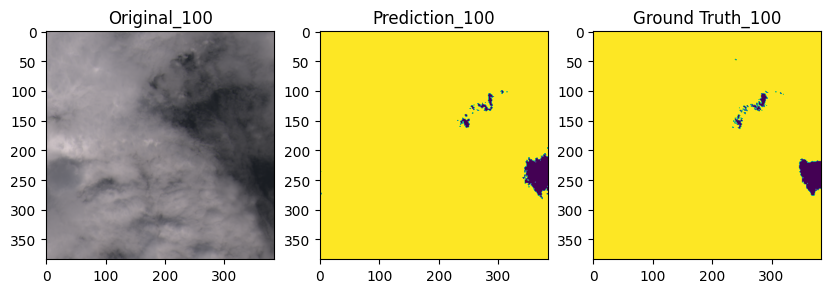

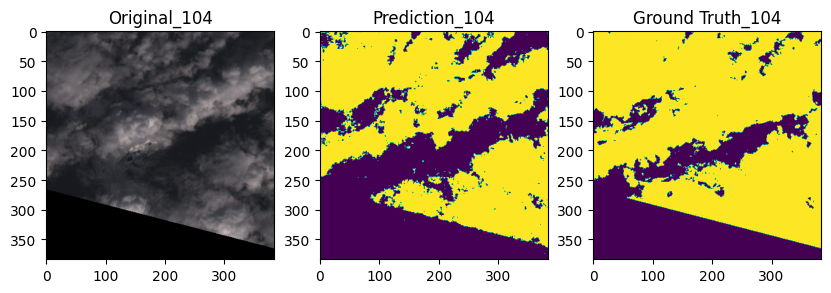

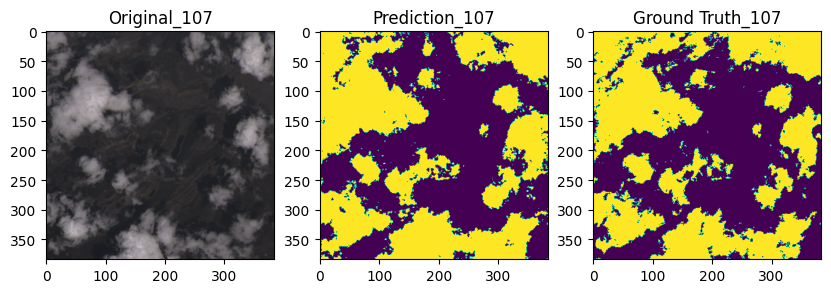

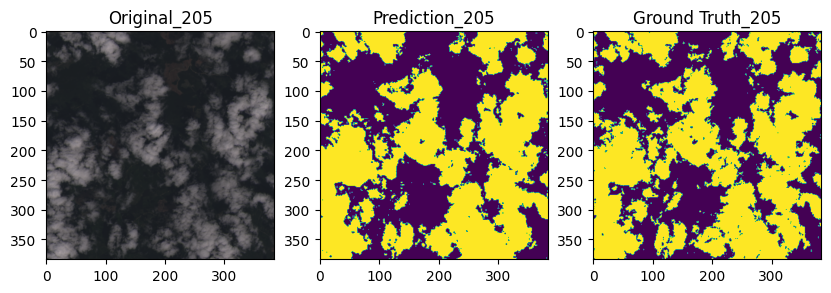

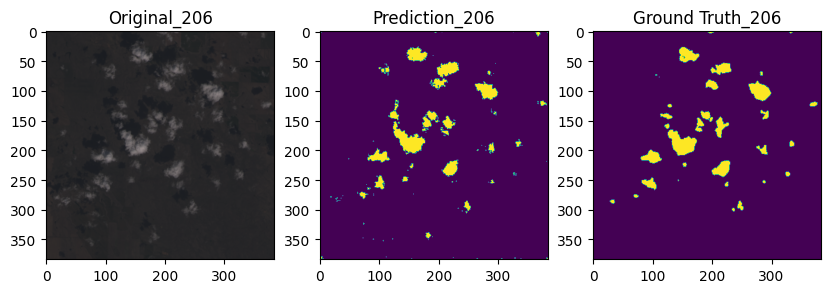

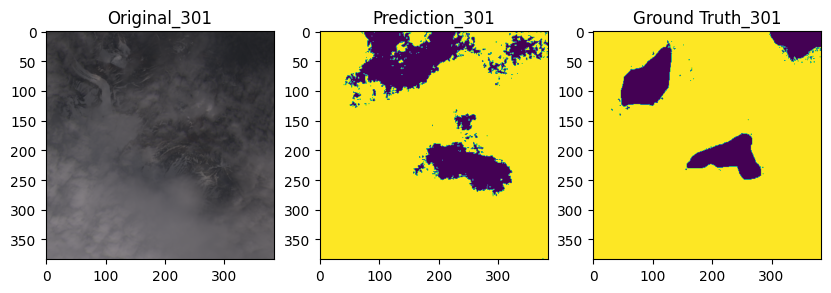

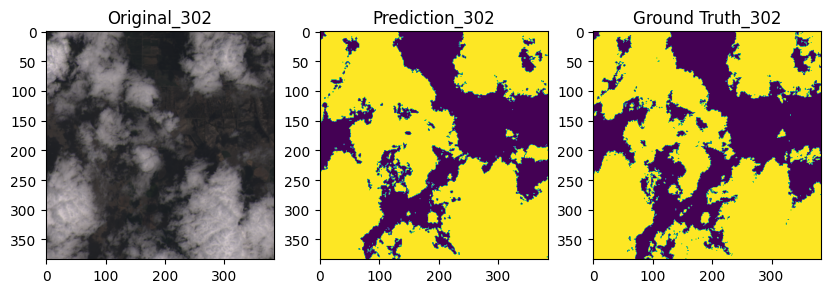

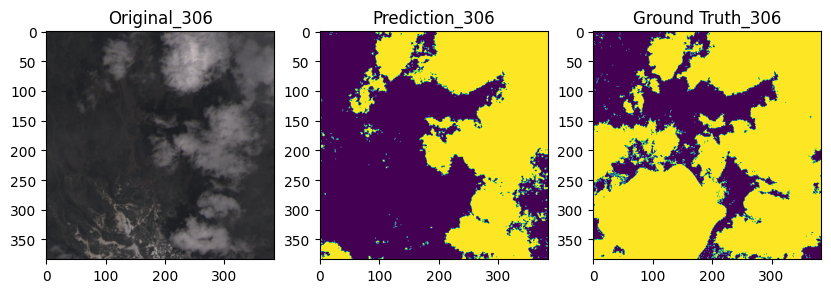

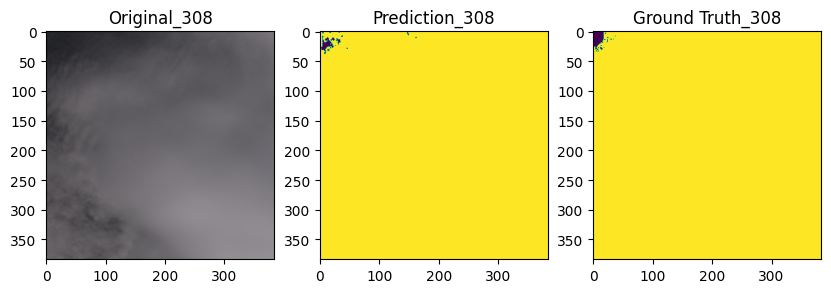

In [54]:
idxs = [100, 104, 107, 205, 206, 301, 302, 306, 308]
for i in idxs:
    plot_predictions(i)

## Evaluation of segmentation quality

Let us calculate mean accuracy for objects

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_object(idx):
    x_test, y_test = data[idx]
    pred = predict(model, x_test.to(device)).detach().cpu()
    yt_flat, pred_flat = y_test.flatten(), pred.flatten()
    return accuracy_score(yt_flat, pred_flat)

In [78]:
num_objects = 8000
accs = []
for i in tqdm(range(num_objects)):
    acc= evaluate_object(i)
    accs.append(acc)

print(f'Accuracy for {num_objects} objects:', np.mean(accs))

  0%|          | 0/8000 [00:00<?, ?it/s]

Accuracy for 8000 objects: 0.9232867016262478
